In [2]:
from itertools import combinations
from math import factorial

#import OS
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
List = [1,   2,  3,  4,  5]
P =    [.45, .25, .15, .1, .05]


def gen_cartones(nfichas,tabs, metodo):# método = "aleatorio","unico","mismos"
    tablas = []
    checks =  []
    if metodo == "aleatorio":
        rng = np.random.default_rng()
        for i in range(tabs):
                tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
                
    elif metodo == "unico":
        tablas.append(np.random.default_rng(1).choice(range(1, nfichas), size=(6, 8), replace=False))
        rng = np.random.default_rng()
    
        for i in range(1,tabs):
            tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
        
    elif metodo == "mismos":
        for i in range(tabs):
            rng = np.random.default_rng(i)
            tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
        
    else:
        print('método = "aleatorio","unico","mismos"')
        
      
    check = np.zeros((tabs,6,8))
    return (tablas, check)

In [5]:
# Normalizar cuenta
tabs = gen_cartones(80,100,'mismos')
tabs[0][0]

array([[66, 37, 28, 63,  6, 48, 18, 44],
       [45,  2, 31, 70, 52, 10,  8, 59],
       [ 3, 49, 61, 22, 50, 71, 40, 42],
       [ 1, 34, 46, 73, 75, 76, 12, 41],
       [79, 55, 21, 53, 56, 68, 33, 35],
       [30, 57, 74, 15, 27, 67, 60, 23]])

In [98]:
def cuenta_y_peso(tablas,porcentaje): # Calcula el peso en base a las fichas mas precentes
    
    cartones = []
    
    for tab in tablas[0]:
        for card in tab:
            cartones.append(card.tolist())

    uni,count=np.unique(cartones,return_counts=True)
   
    for cart in tablas[0][0]:
        for ficha in cart:
            count[ficha-1] = count[ficha-1]+(count.max()*porcentaje/100)
            
    return (uni,count/count.sum()) # Variables unicas , Peso de fichas (Sum = 1) 

In [119]:
lista, peso =cuenta_y_peso(tabs,30)
display(len(lista), len(peso))
lista,peso

79

79

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 array([0.01509163, 0.01437298, 0.01437298, 0.01042041, 0.00988142,
        0.01293568, 0.00988142, 0.01437298, 0.01257636, 0.01275602,
        0.01077973, 0.01131872, 0.01131872, 0.01077973, 0.01491197,
        0.01042041, 0.01042041, 0.01275602, 0.01167805, 0.01257636,
        0.01491197, 0.01383399, 0.01275602, 0.0109594 , 0.01131872,
        0.01060007, 0.01347467, 0.0147323 , 0.01239669, 0.01383399,
        0.01365433, 0.01113906, 0.01401365, 0.01455264, 0.01365433,
        0.01024075, 0.01437298, 0.0109594 , 0.01167805, 0.01383399,
        0.01365433, 0.01491197, 0.00916277, 0.01401365, 0.01401365,
        0.01347467, 0.01203737

In [120]:
print(f'El maximo es {peso.max()}')
for cart in tabs[0][0]:
    for ficha in cart:
        print(peso[ficha-1])

El maximo es 0.015091627739849083
0.01437297879985627
0.01437297879985627
0.014732303269852677
0.01383399209486166
0.012935680919870643
0.012576356449874237
0.01275601868487244
0.014013654329859864
0.014013654329859864
0.01437297879985627
0.013654329859863456
0.013654329859863456
0.013474667624865252
0.01275601868487244
0.01437297879985627
0.01491196550485088
0.01437297879985627
0.01383399209486166
0.01329500538986705
0.01383399209486166
0.014732303269852677
0.014732303269852677
0.01383399209486166
0.01491196550485088
0.015091627739849083
0.014552641034854473
0.013474667624865252
0.01275601868487244
0.01383399209486166
0.014013654329859864
0.011318720804886813
0.013654329859863456
0.012576356449874237
0.01491196550485088
0.01491196550485088
0.01221703197987783
0.012576356449874237
0.013474667624865252
0.014013654329859864
0.013654329859863456
0.01383399209486166
0.014013654329859864
0.01437297879985627
0.01491196550485088
0.013474667624865252
0.014013654329859864
0.013654329859863456
0

In [ ]:
uni,count=np.unique(tabs[0], return_counts=True)
index = 37
porcentaje=40
count[index-1],uni[index-1]
lista,peso


In [167]:
nfichas = 80
len(np.random.choice(lista,nfichas-1,replace=False, p=peso))

79

In [ ]:
for cart in tabs[0][0]:
        for ficha in cart:
            count[ficha-1] = count.max()*(porcentaje/100)
        

In [82]:
 for cart in tabs[0][0]:
        for ficha in cart:
            print(ficha,uni[ficha-1],count[ficha-1])

66 67 28
37 38 61
28 29 69
63 64 56
6 7 55
48 49 28
18 19 65
44 45 28
45 46 28
2 3 28
31 32 62
70 71 28
52 53 28
10 11 60
8 9 70
59 60 28
3 4 58
49 50 28
61 62 63
22 23 28
50 51 58
71 72 62
40 41 28
42 43 51
1 2 28
34 35 28
46 47 67
73 74 28
75 76 28
76 77 54
12 13 63
41 42 28


IndexError: index 79 is out of bounds for axis 0 with size 79

In [ ]:
# print(list(zip(uni,count))) # Esto es para ver la lista

#count_norm=count/count.sum() # Para hacer el vector de peso#
#count_norm.sum()

#nfichas= 80
#random.sample(range(1,nfichas+1), nfichas)# Lista de ficha
#List = np.arange(1,nfichas,dtype=int)

#np.random.choice(List,nfichas-1,replace=False, p=count_norm)

#len(np.arange(1,nfichas+1,dtype=int))
tabs = gen_cartones(80,100,'mismos')

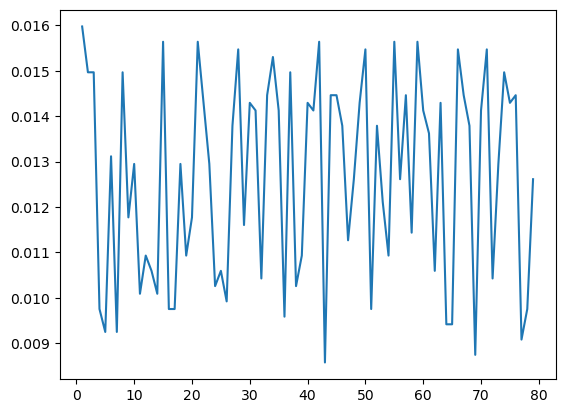

In [61]:
plt.plot(lista,peso)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 array([68, 64, 64, 58, 55, 56, 55, 64, 70, 55, 60, 47, 63, 60, 67, 58, 58,
        55, 65, 70, 67, 61, 55, 61, 63, 59, 59, 66, 69, 61, 60, 62, 62, 65,
        60, 57, 64, 61, 65, 61, 60, 67, 51, 62, 62, 59, 67, 54, 61, 66, 58,
        59, 52, 65, 67, 54, 62, 68, 67, 60, 58, 63, 61, 56, 56, 66, 62, 59,
        52, 60, 66, 62, 55, 64, 61, 62, 54, 58, 54]))

In [132]:
nfichas= 80
random.sample(range(1,nfichas), nfichas)# Lista de ficha
random.choices(List, weights=(.1, .4, .2, .2, .1), k=5)

count

ValueError: Sample larger than population or is negative

In [ ]:
for i in range(100):
    List = [1, 2, 3, 4, 5]
    print(np.random.choice(List,5,replace=False, p=P))

In [131]:
for tab in tabs[0]:
    print(tab[tab==0])

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


1.0